<center><h1>QBUS6850 - Machine Learning for Business</h1></center>

# Tutorial 2 - Linear Algebra, Data Handling and Plotting

**Roadmap: tutorial 2**  

1. import libraries
2. numpy  
    - basic operations on vectors
    - basic operatiosn on matrices
3. pandas  
    - load dataset from .csv
    - data manipulation
4. pyplot
    - bar chart
    - line plot

**Review: lecture 1**


**Review: tutorial 1**  
1. Python Script  
2. List  
    - `.append()`
    - `len()`
3. Conditional  
    - `if`...`elif`...`else`  
4. Loops 
    - `for` loop   
    - `while` loop  
5. Functions
    - `def`
6. String formating
    - `input()`
    - `.format()`
7. Class

## 1. Libraries

For this tutorial you will need to use external libraries. Libraries are groups of useful functions for a particular domain.

The import statement is used to import code libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Numpy contains useful linear algebra functions. Numpy borrows many function names and concepts from MATLAB.

## 2. Numpy
### 2.1 Vectors

Creating a <span class="mark">vector</span> is straight forward with numpy. To create a vector you can either use either

In [92]:
a = np.array([1, 2, 3])#.reshape(-1,1)

A = np.matrix([1, 2, 3])

where the contents of the [ ] (square brackets) are the contents of the vector.

You can check the <span class="mark">shape of a vector</span> by

In [91]:
print('the shape of the vector a is {}'.format(a.shape))
print('the shape of the matrix A is', A.shape)

the shape of the vector a is (3, 1)
the shape of the matrix A is (1, 3)


**Note that the shape of vector a is different from vector A. This is because numpy array dimensions are ambiguous. It can be interpreted as a row or column vector. If you want to exactly specify the shape then use the matrix function instead to create your vector.**

Be careful with arrays! <span class="burk">Products of arrays are elementwise</span>, not vector multipliciation!

In [93]:
print(a * a) # 3 dim vector
# [1,2,3]*[1,2,3]

# for inner product, try
print(np.dot(a,a))
# or 
print(A * A.transpose()) # equivalent to: A*A.T

[1 4 9]
14
[[14]]


The type of data that a vector (and matrix) can store is fixed to a single type. You cannot mix integers, floats etc in the same vector. Numpy infers the data type from the data used to create the vector. 

In [94]:
# check datatype
print(a.dtype) # datatype of the values inside the variable
print(type(a)) # type of the variable

int64
<class 'numpy.ndarray'>


In [96]:
# compare the difference
c = np.array([1.0, 2.0, 3.0])
print(c.dtype)
print(type(c))

float64
<class 'numpy.ndarray'>


Here are some useful shortcuts for creating common <span class="mark">special vectors</span>

In [100]:
twos

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [97]:
# Length 10 zero vector
zeros = np.zeros((10,1))

# Length 5 ones vector
ones = np.ones((5,1))

# You can create a single valued vector as the product of a vector of ones and your desired value
twos = ones * 2

# 11 numbers from 0 to 100, evenly spaced
lin_spaced = np.linspace(0, 100, 11) # np.linspace(start, stop, number)
# compare: the difference from np.arange?

# All numbers from 0 up to (not including) 100 with gaps of 10
aranged = np.arange(0, 100, 10) # np.arange(start, stop, step)


In [13]:
np.linspace(0, 100, 11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [14]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

<span class="mark">Vector transposition</span> is straight forward

In [101]:
A_transposed = A.transpose() # A.T

Checking for <span class="mark">vector/array equality</span> is a little trickier than checking for equality of other types. Here is how I suggest you check if two vectors are equal

In [18]:
# np.array_equal: True if two arrays have the same shape and elements, False otherwise.
print(np.array_equal(A, A))
print(np.array_equal(A, A_transposed))

# You may wish to check equality up to a tolerance
# This is useful since floating points aren't perfect
print(np.allclose(A, A, rtol=1e-05))
# tol = 0.1
# 4.91 = 5   0.09

True
False
True


Vectors can be summed together as expected, or <span class="mark">linear combinations</span> can be formed

In [102]:
# sum of two vectors
c = a + a

# linear combination
d = 3*a + 1.5*c

In [103]:
# [1,2,3]
print(c)
print(d)

[2 4 6]
[ 6. 12. 18.]


Taking the <span class="mark">norm</span> of the vector is taken care of by numpy

In [21]:
norm2 = np.linalg.norm(a, ord = 2) 

norm3 = np.sqrt(1**2 + 2**2 + 3**2)
norm4 = np.sqrt(np.sum(a**2))

print(norm2)
print(norm3)
print(norm4)

3.7416573867739413
3.7416573867739413
3.7416573867739413


We can test if two vectors are <span class="mark">orthogonal</span> by the dot product. If vectors are orthog then their <span class="mark">inner product</span> (dot product) is 0.

In [104]:
# Generate an orthogonal vector
x = [1, 2, 3]
y = [4, 5, 6]
orthog = np.cross(x, y) # cross product of x and y: np.dot(x,orthog) = np.dot(y,orthog) = 0
print(orthog)

# read as: 
if np.dot(x, orthog) == 0 and np.dot(y, orthog) == 0:
    print("Orthogonal") 
else: 
    print ("Not Orthogonal")

[-3  6 -3]
Orthogonal


### 2.2 Matrices

Numpy Matrices behave in the same way as vectors

In [105]:
b = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])

B = np.matrix([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])

print(b)
print(B)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [106]:
# Multiplication of matrices is as normal
print(B * B) 

[[ 30  66 102]
 [ 36  81 126]
 [ 42  96 150]]


##### Q: how did we get this result?

In [107]:
# Scalar Product
print(5 * B)

[[ 5 20 35]
 [10 25 40]
 [15 30 45]]


In [32]:
# Summing
print(B + B)

[[ 2  8 14]
 [ 4 10 16]
 [ 6 12 18]]


In [33]:
# Transpose
print(B.transpose())

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Some useful shortcuts for special matrices

In [34]:
# 10 x 10 zero matrix
m_zeros = np.zeros((10,10))
print(m_zeros)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
# 5 x 5 ones matrix
m_ones = np.ones((5,5))
print(m_ones)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [36]:
# Matrix of all twos
m_twos = m_ones * 2
print(m_twos)

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


Often we are interested in the <span class="mark">diagonal</span> entries of a matrix (e.g. covariance matrices) or creating a diagonal matrix (e.g. <span class="mark">identity matrix</span>)

In [37]:
# Identity matrix
eye = np.identity(3)
print(eye)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [39]:
B

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [38]:
# Get the diagonal entries
diag_elements = np.diag(B)
print(diag_elements)

[1 5 9]


In [40]:
# Create a matrix with values along the diagonal
m_diag = np.diag([1,2,3])
print(m_diag)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Other useful functions of matrices include the <span class="mark">rank</span>, <span class="mark">trace</span> and <span class="mark">determinant</span>. The rank tells us how many linearly independent cols or rows there are, the trace is used in calculating norms and the determinant tells us if the matrix is invertible.

In [41]:
# Matrix Rank i.e. n linearly independent cols or rows
print(np.linalg.matrix_rank(B))

# Sum of diagonal entries
print(np.trace(B))

# Determinant
e = np.array([[1, 2], [3, 4]])
print(np.linalg.det(e))

# invertible
print("Matrix is invertible") if np.linalg.det(e) != 0 else print ("Matrix not invertible")

# if np.linalg.det(e) != 0:
#     print("Matrix is invertible") 
# else:
#     print ("Matrix not invertible")

2
15
-2.0000000000000004
Matrix is invertible


### ⭐ TASK 1: Matrices and Vectors

1. Create two vectors $\mathbf a = [1, 2, 0]^T$ and $\mathbf b = [2, -1, 10]^T$
2. Calculate $\mathbf c = \mathbf a^T \mathbf b$ i.e. the inner product of $\mathbf a$ and $\mathbf b$
3. Are $\mathbf a$ and $\mathbf b$ orthogonal?
4. Create a matrix $\mathbf A = \left [  \begin{array}{ccc} 1 & -1 & 2 \\ 0 & -3 & 1 \end{array} \right] $
5. Calculate $\mathbf x = \mathbf A \mathbf b$
6. What is the size (shape) of $\mathbf x$?
7. Calculate $\mathbf Y = \mathbf A^T \mathbf A$
8. What is the size (shape) of $\mathbf Y$? 


In [108]:
# 1
a = np.array([1,2,0])
b = np.array([2,-1,10])
print(a)
print(b)

[1 2 0]
[ 2 -1 10]


In [43]:
# 2
c = np.dot(a,b)
print(c)

0


In [44]:
# 3
if c == 0:
    print('orthogonal')
else: 
    print('not orthogonal')

orthogonal


In [110]:
# 4
A = np.matrix([[1,-1,2],
               [0,-3,1]])
print(A) # 2*3, 3*1, 2*1

[[ 1 -1  2]
 [ 0 -3  1]]


In [111]:
# 5
x = np.dot(A, b).reshape(-1,1)
print(x)

[[23]
 [13]]


In [51]:
# 6
x.shape
np.shape(x)

(2, 1)

In [52]:
# 7
Y = np.dot(A.T, A) # 3*2, 2*3 = 3*3
print(Y)

# A.transpose()
# A.T

[[ 1 -1  2]
 [-1 10 -5]
 [ 2 -5  5]]


In [53]:
# 8
Y.shape

(3, 3)

## 3. Pandas

### 3.1 Load dataset

Pandas is a library for <span class="girk">data manipulation</span>. The key feature of Pandas is that the data structures it uses can hold multiple different data types. For example it can create an array with integers, strings and floating point numbers all at once. You could consider this capability as similar to an excel spreadsheet. Whereas you cannot mix and match data types in Python Lists or Numpy Arrays.

Pandas is already installed and available in Anaconda/Spyder. To begin using it we first <span class="mark">import</span> it as follows

In [112]:
import pandas as pd

Download the **drinks.csv** file from Canvas and <span class="burk">place it in the same folder as your Python file</span>.

Then <span class="mark">load the CSV</span> by using

In [113]:
drinks = pd.read_csv('drinks.csv') # csv, txt
# pd.read_excel('xxxx.xls') # excel


Check that the DataFrame was loaded correctly by viewing some basic information

In [114]:
# check datatype and missing values
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [ ]:
# remove col, row
    # 1/20000 - remove row
    # col, 199/200
# fillna
    # know why its empty
    # fillna(0), mean, mode, ...

View <span class="mark">summary statistics</span> of the DataFrame drinks by using the describe function

In [58]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


Now you can begin to manipulate the data. Lets begin by <span class="mark">extracting the beer_servings column</span>. Extracting a column will return a variable with the Series type, not DataFrame. Series is for 1D data and DataFrame is for 2D data.

Here I have used the head function to <span class="mark">show the first 5 rows</span>.

In [117]:
drinks['beer_servings'].tail() # head()

188    333
189    111
190      6
191     32
192     64
Name: beer_servings, dtype: int64

Similar to a DataFrame, you can get <span class="mark">statistics</span> on a Series. Try it

In [118]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

You can get <span class="mark">single statistics</span> from a series

In [119]:
#np.round(drinks['beer_servings'].mean(), 4)
# print(.format(drinks['beer_servings']))

You can <span class="mark">search or query the DataFrame</span>. For example you can get the rows where the continent is Europe. Try the following

In [120]:
# df[conditions]
euro_frame = drinks[drinks['continent'] == 'EU']
euro_frame
# Again you can query this Series for it’s own statistics
# np.round(euro_frame['beer_servings'].mean(), 4)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


Again you can query this Series for it’s own statistics.

Queries can be <span class="mark">compounded.</span> In the following example you will get the countries in Europe where the number of wine servings is greater than 300. 

In [84]:
euro_heavywine = drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]
# &: and
# |: or

# df[(condition1) & (condition2)]
# df[(condition1) | (condition2)]

DataFrames can be sorted. Try the following code to <span class="mark">sort by litres</span> of alcohol and <span class="mark">return the last 10 entries</span> using the tail function

In [122]:
top_drinkers = drinks.sort_values(ascending=False, by='total_litres_of_pure_alcohol')#.tail(10)
top_drinkers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


### 3.2 Handling Missing Data

The drinks_corrupt.csv actually contains lots of missing entries. Pandas filters out any rows with missing data automatically for you. However sometimes you may want to filter them out manually or specify special codes to ignore etc.

In this case we want to do two things:
- Keep contintent code "NA" since this is valid and means "North America"
- Remove all other rows containing legitimate missing values

By default Pandas will convert "NA" to NaN data type. We should prevent this.

In [ ]:
# 1/20000: delete the record
# 199/200: NaN in columnA

In [ ]:
# first import and check the dataset
df = pd.read_csv('drinks_corrupt.csv')

#df[df.isna().any(axis = 1)]
df[df.iloc[:,:-2].isna().any(axis = 1)]

In [74]:
# set NA values, exclude 'NA'
default_na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', 
                     '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'nan']

our_na_values = default_na_values
our_na_values.remove('NA')

drinks_dirty = pd.read_csv('drinks_corrupt.csv', keep_default_na = False, na_values = our_na_values)

Check the <span class="mark">number of NaN</span> values per column

In [75]:
drinks_dirty.isnull().sum() # or use: drinks_dirty.info()
# 200 record
# 1 NaN : mean / 0 or remove the record
# 190 NaN: delete this col

country                         0
beer_servings                   4
spirit_servings                 5
wine_servings                   1
total_litres_of_pure_alcohol    0
continent                       3
dtype: int64

To <span class="mark">remove rows</span> that contain any missing entries try the dropna function

In [76]:
drinks_clean = drinks_dirty.dropna() # default: drop 'row' with 'any' NaN
# if you don't want to create a new variable, try: 
# drinks_dirty.dropna(inplace = True)

If you want to remove rows where every column has a missing entry use the how parameter

In [77]:
drinks_clean_byrows = drinks_dirty.dropna(how = 'all')
# how = 'any', 
# how = 'all'

**Alternative choice of handling missing values**

Instead of deleting corrupt or missing entries you can <span class="mark">replace them with a useful value</span>. If we use the drinks.csv file we know there are no corrupt or missing entries. In this case we can simply use **replacement** to fix the "NA" (North America) issue.

In [ ]:
drinks = pd.read_csv('drinks.csv')
# To replace the data in place, use the fillna function
drinks['continent'].fillna(value = 'NA', inplace = True)
# df = drinks['continent'].fillna(value = 'NA')
# replace with ‘NA’ in column 'continent'

# NA - NaN

### 3.3 Creating Columns

You can <span class="mark">create new columns</span> as a function of (i.e. based on) the existing columns. For example try creating a total_servings column

In [78]:
# eg1. create a total_servings column
drinks['total_servings'] = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings 

# eg2. create the total litres column
drinks['alcohol_mL'] = drinks.total_litres_of_pure_alcohol * 1000

Then check your changes using the head function

In [79]:
# Check changes
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


### 3.4 Renaming Data

Renaming columns is straightforward

In [80]:
drinks.rename(columns={'total_litres_of_pure_alcohol':'alcohol_litres'}, inplace=True)

In [81]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,alcohol_litres,continent,total_servings,alcohol_mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


### 3.5 Deleting Data

Deleting data is easy with the drop function.

In [ ]:
# axis = 1 refers to columns; axis = 0 refers to rows
drinks_wout_ml = drinks.drop(['alcohol_litres'], axis = 1)

### ⭐ TASK 2: Pandas

Download the **happiness_2016.csv** file from blackboard.

This file contains the data from the world happiness report and contains a number of metrics about each country relating to quality of life.

1. Load the **happiness_2016.csv** data file using Pandas read_csv
2. Check if there are any missing or corrupt values by using Code_Task2_2
3. Delete rows containing NaN values
4. Get all countries in South East Asia with a Freedom score greater than 0.5 (store in variable called 'free_sea')

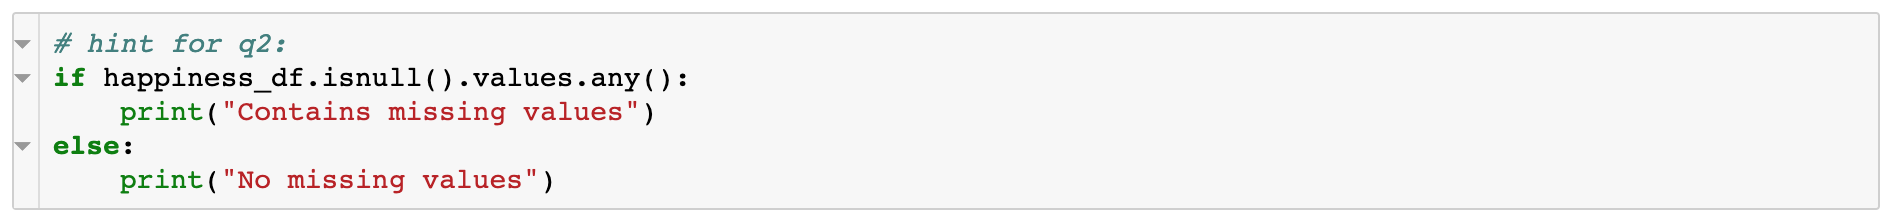

In [ ]:
# solution
# 1. 
happiness_df = pd.read_csv('happiness_2016.csv')

# 2. 
if happiness_df.isnull().values.any():
    print("Contains missing values") 
else:
    print("No missing values")
    
# 3. 
happiness_df.dropna(inplace = True)

# 4. 
free_sea = happiness_df[(happiness_df['Region'] == 'Southeastern Asia') & 
                        (happiness_df['Freedom'] > 0.5)]['Country']

## 4. Pyplot

Pyplot is a library for data plotting. Pyplot follows many of the conventions of MATLAB's plotting functions. It provides a very simple interface to plotting for common tasks.

Pyplot is already installed and available in Anaconda/Spyder. To begin using it we first import it as follows

In [123]:
import matplotlib.pyplot as plt

Pyplot requires a figure to draw each plot upon. A figure can contain a single plot or you can subdivide it into many plots. You can think of a figure as a "blank canvas" to draw on.

### 4.1 Bar Chart

Lets create a simple bar chart comparing the number of beer servings among EU countries that drink lots of wine.

The first parameter of the bar(x, y) function is the x position to draw at and the second is the vertical heights of each bar. Here we use x = ind and y = euro_heavywine['beer_servings']

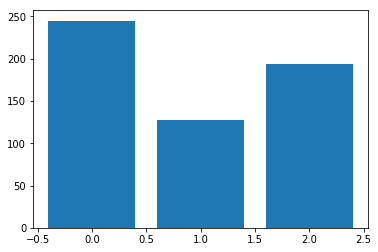

In [85]:
ind = np.arange(len(euro_heavywine))

plt.bar(ind, euro_heavywine['beer_servings']);

Text(0.5, 1.0, 'Beer Servings of Heavy Wine Drinking EU Countries')

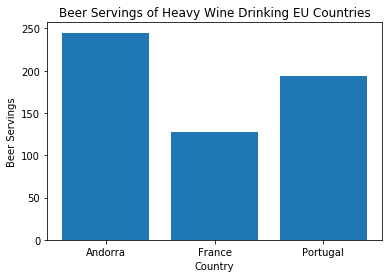

In [86]:
# for a good presentation:

plt.bar(ind, euro_heavywine['beer_servings'])
# Use the `xticks` function to label the individual bars
plt.xticks(ind, euro_heavywine['country'])
# label each of the axis
plt.xlabel("Country")
plt.ylabel("Beer Servings")
# give a title
plt.title("Beer Servings of Heavy Wine Drinking EU Countries")
#plt.legend()

### 4.2 Line Plot

Lets create a line plot showing the total servings of top drinking countries in descending order.

Create a new figure to draw on

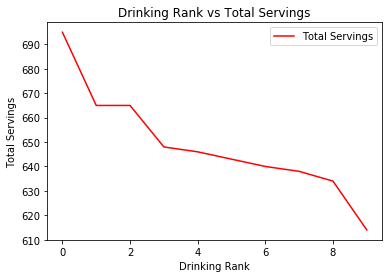

In [87]:
# Get the 10 countries with the highest total servings
top_drinkers = drinks.sort_values(by='total_servings', ascending=False).head(10)

# label the Line plot with explanations on the customized colour
# this is critical especially when you have more than 2 entries
# try: linestyle and markerstyle
plt.plot(np.arange(0,10,1), top_drinkers['total_servings'], label="Total Servings", color="red")

# Label each of the axis and title
plt.xlabel("Drinking Rank")
plt.ylabel("Total Servings")
plt.title("Drinking Rank vs Total Servings")

# Activate the legend using label information 
plt.legend();

### ⭐ TASK 3: Plotting

1. Plot a bar chart of 'free_sea'. Include:
    - Labels for each bar
    - X axis label
    - Y axis label
    - Title
    
2. Plot a line chart of 'Health (Life Expectancy)' of all countries in descending order (left to right). Include:
    - X axis label
    - Y axis label
    - Title
    - Legend

In [ ]:
# 1.
# prepare index for free_sea
ind = np.arange(len(free_sea))

plt.figure()
# bar chart
plt.bar(ind, free_sea['Happiness Score'])
# define xticks
plt.xticks(ind, free_sea['Country'])
# add xlabel and ylabel
plt.xlabel('Country')
plt.ylabel('Happiness Score')
# add title
plt.title('Happiness Score of SEA Countries with Freedom > 0.5');


#%%
# 2. 
plt.figure()
# line chart
plt.plot(happiness_df['Health (Life Expectancy)'], label = "Life Expectancy")
# xlabel, ylabel, title
plt.xlabel('Happiness Rank')
plt.ylabel('Life Expectancy')
plt.title('Happiness Rank vs Life Expectancy')
# Add the legend
plt.legend();